# Contextualização do Problema

O dataset selecionado apresenta uma aglomerado de informações referentes aos hábitos estudantis de 1000 alunos, dentre eses hábitos possuímos alguns como:
`horas estudadas no dia`, `padrões de sono`, `dieta`, `saúde mental`, `tempo de rede social`, entre outros. O objetivo é mapear como que cada um desses hábitos influencia na perfôrmace acadêmica desses alunos.


## Tarefa Pedida:

[link do dataset](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance/data)

1. Apenas com a observação dos dados por meio de tabelas e dataframe,
apresente suas hipóteses;
2. Realize uma EDA da forma que julgar mais adequada;
3. Com base na EDA realizada, revise as suas hipóteses a respeito do dados;
4. Construa um algoritmo de K-Means from scratch utilizando a linguagem
Python;
5. Apresente a justificativa de forma discursiva e por meio de cálculos, o valor
de K utilizado;
6. Revise as hipóteses levantadas no exercício 1 e 2 e com base no algoritmo
desenvolvido, apresente análise crítica a respeito das informações extraídas
dos dados caso o algoritmo refute ou confirme suas hipóteses;

## Objetivo

Agrupar alunos com hábitos similares e identificar padrões de comportamento que afetam a performance usando K-Means (e depois refletir se ele faz sentido com nossas hipóteses)

## Análise de Dados

In [2]:
# Importando e analisando a estrutura do dataFrame
import pandas as pd
import numpy as np

df = pd.read_csv("/content/student_habits_performance.csv")

# df.head()

# Informações gerais sobre os dados
df.info()

# Visão geral
df.describe(include='all')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
count,1000,1000.0000,1000,1000.00000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,909,1000,1000.000000,1000,1000.000000
unique,1000,NaN,3,NaN,NaN,NaN,2,NaN,NaN,3,NaN,3,3,NaN,2,NaN
top,S1999,NaN,Female,NaN,NaN,NaN,No,NaN,NaN,Fair,NaN,High School,Good,NaN,No,NaN
freq,1,NaN,481,NaN,NaN,NaN,785,NaN,NaN,437,NaN,392,447,NaN,682,NaN
mean,NaN,20.4980,NaN,3.55010,2.505500,1.819700,NaN,84.131700,6.470100,NaN,3.042000,NaN,NaN,5.438000,NaN,69.601500
std,NaN,2.3081,NaN,1.46889,1.172422,1.075118,NaN,9.399246,1.226377,NaN,2.025423,NaN,NaN,2.847501,NaN,16.888564
min,NaN,17.0000,NaN,0.00000,0.000000,0.000000,NaN,56.000000,3.200000,NaN,0.000000,NaN,NaN,1.000000,NaN,18.400000
25%,NaN,18.7500,NaN,2.60000,1.700000,1.000000,NaN,78.000000,5.600000,NaN,1.000000,NaN,NaN,3.000000,NaN,58.475000
50%,NaN,20.0000,NaN,3.50000,2.500000,1.800000,NaN,84.400000,6.500000,NaN,3.000000,NaN,NaN,5.000000,NaN,70.500000
75%,NaN,23.0000,NaN,4.50000,3.300000,2.525000,NaN,91.025000,7.300000,NaN,5.000000,NaN,NaN,8.000000,NaN,81.325000


##  Hipóteses

1. Alunos com mais horas de estudo por dia terão desempenho melhor?
2. Menos horas de sono estão ligados a desempenho ruim?
3. Alunos com maior tempo em redes sociais tendem a ter uma nota mais baixa?
4. Ter uma boa dieta e saúde mental estão ligadas a uma nota melhor?


## O que se pode analisar a primeiro momento

Atributos relacionados a:
- Estudo (`study_hours_per_day, exam_score`)
- Estilo de vida (`sleep_hours, social_media_hours, netflix_hours,diet_quality, exercise_frequency`)
- Fatores externos (`internet_quality, parental_education_level, part_time_job, extracurricular_participation`)
- Saúde mental (`mental_health_rating`)
- Demográficos (`age, gender`)

| Ponto                         | Análise                                                                                                                                             |
| ----------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| **Valores faltantes**         | A coluna `parental_education_level` tem 91 valores ausentes                                                                                         |
| **Colunas categóricas**       | `gender`, `part_time_job`, `diet_quality`, `internet_quality`, `extracurricular_participation`, `parental_education_level` precisam ser codificadas |
| **Outliers possíveis**        | Algumas colunas como `study_hours_per_day` e `sleep_hours` têm intervalos amplos (ex: até 8.3h por dia de estudo, 10h de sono etc.)                 |
| **Identificador**             | `student_id` é irrelevante para análise → deve ser removido                                                                                         |
| **Target para clusterização** | A variável `exam_score` pode ser **usada para validar clusters**, mas não será incluída no clustering (não supervisionado)                          |


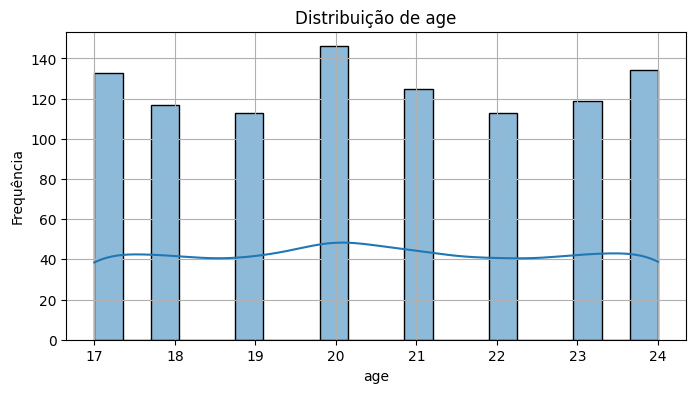

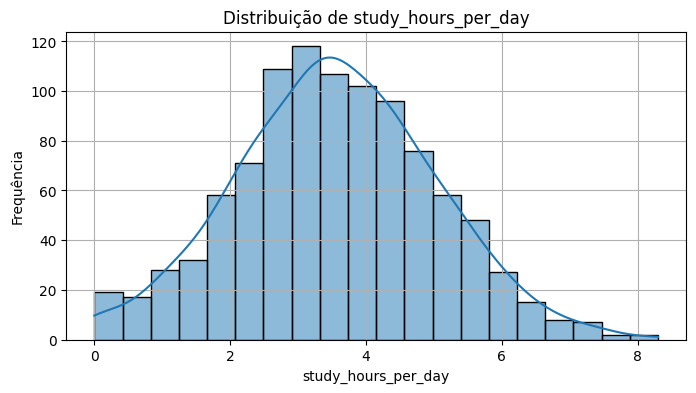

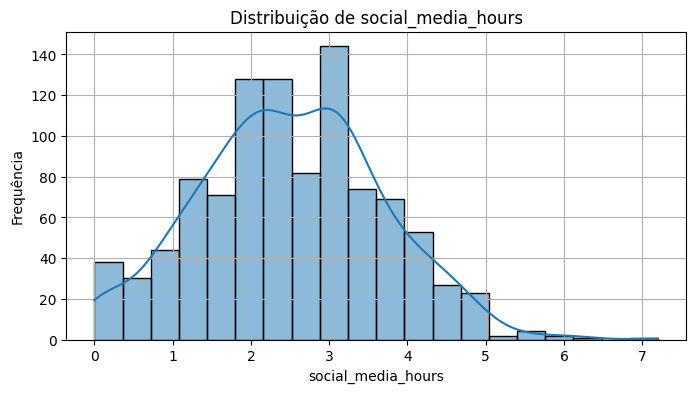

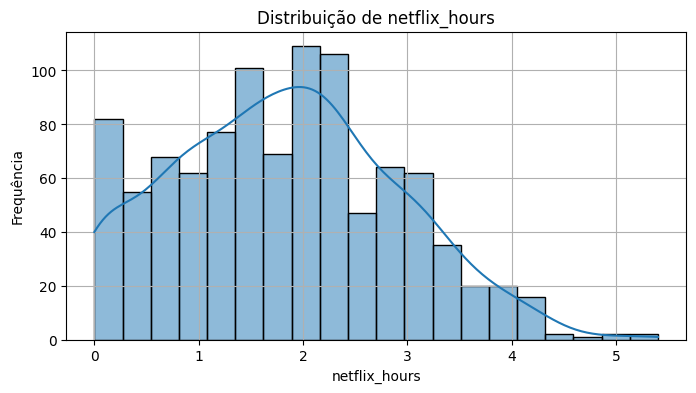

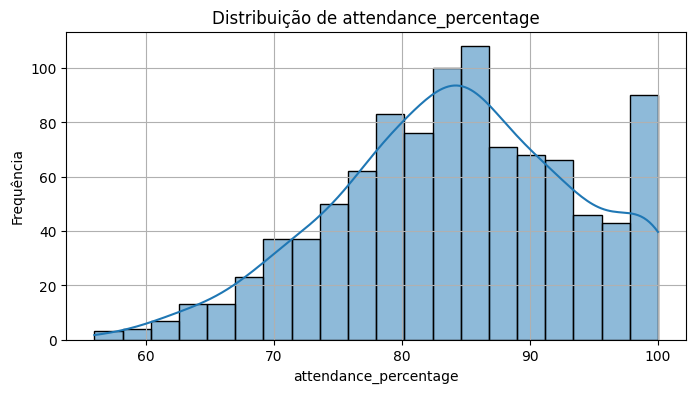

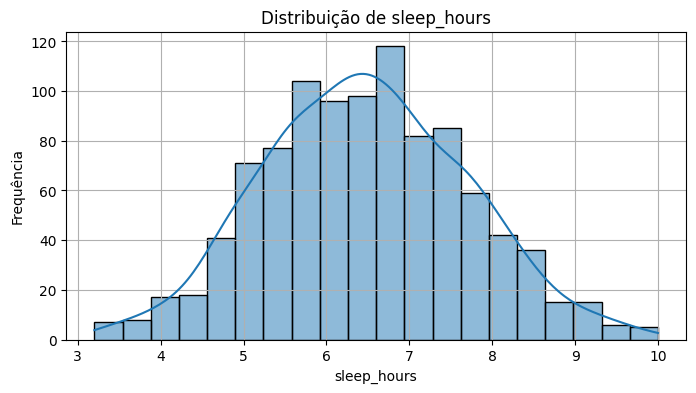

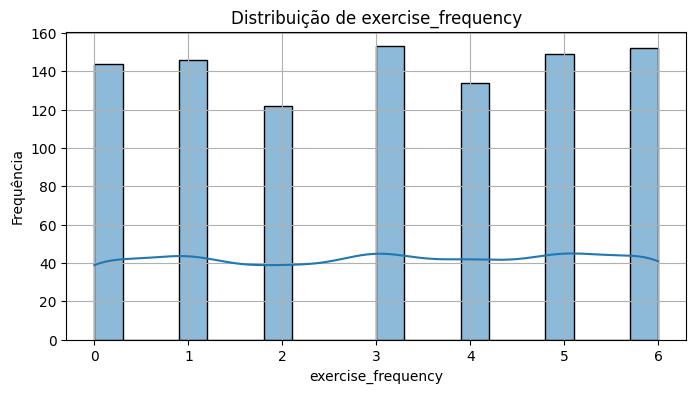

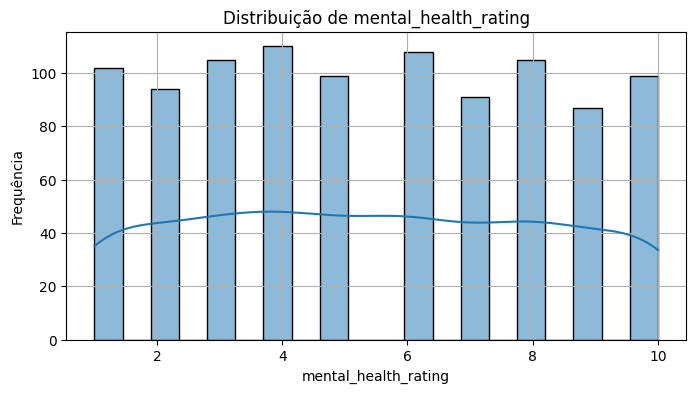

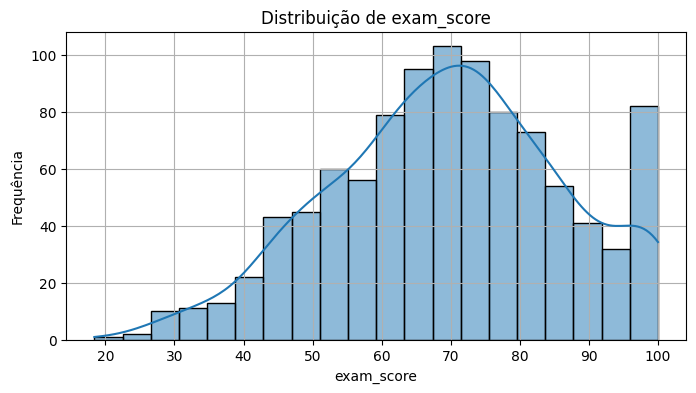

In [11]:
## Analisando variáveis numéricas:
import matplotlib.pyplot as plt
import seaborn as sns

# Limpando coluna de `perantal_education_level`
df['parental_education_level'] = df['parental_education_level'].fillna("Unknown")

num_cols = ['age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
            'attendance_percentage', 'sleep_hours', 'exercise_frequency',
            'mental_health_rating', 'exam_score']

for col in num_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

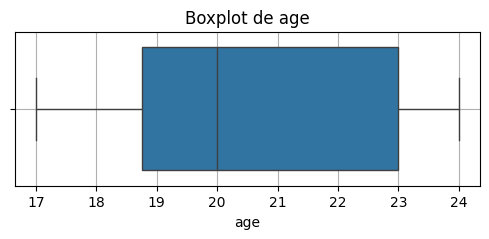

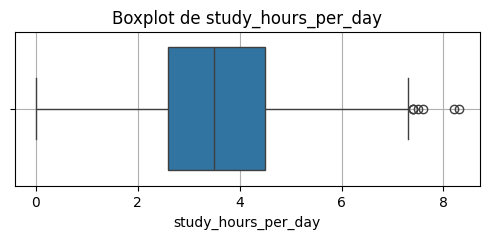

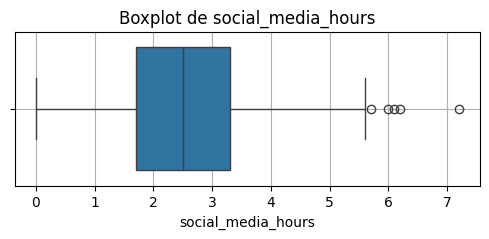

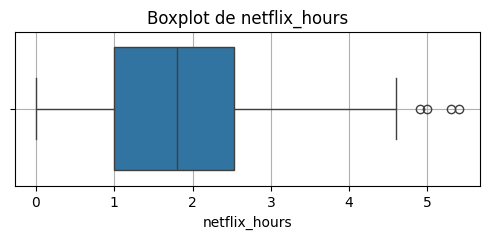

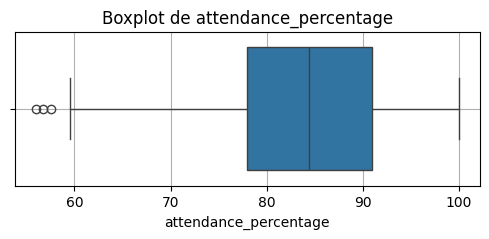

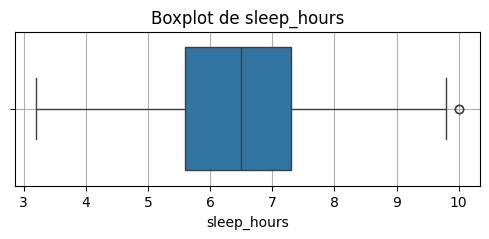

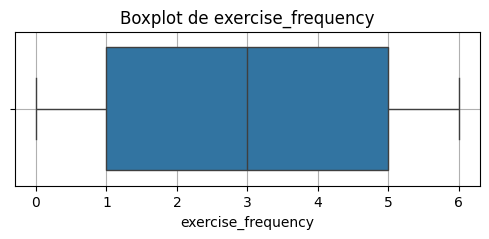

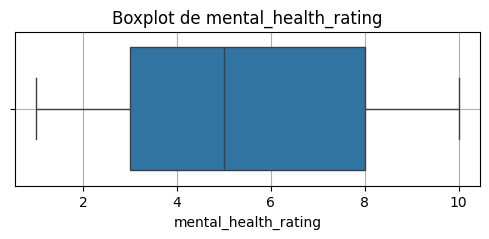

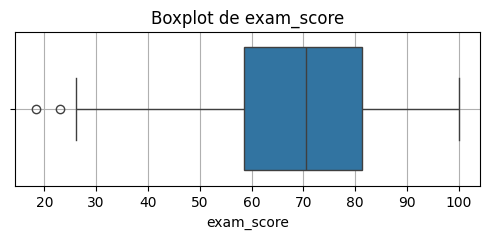

In [7]:
## Detecção de outliers com boxplot
for col in num_cols:
  plt.figure(figsize=(6, 2))
  sns.boxplot(data=df, x=col)
  plt.title(f'Boxplot de {col}')
  plt.grid(True)
  plt.show()


## Análise de gráficos

Com base nos gráficos que foram plotados, vemos que alguns valores tendem a ter uma recorrência maior, como por exemplo `age`, `exercise_frequency` e `mental_health_rating` estão com valores bem dispersos, não ocorrendo tantas oscilações nos gráficos, porém, segundo os gráficos de boxplot, as features que possuem alguns outliers são:
- `study_hours_per_day`
- `social_media_hours`
- `netflix_hours`
- `sleep_hours`
- `exam_score`

`study_hours_per_day`: média de ~3.5h/dia; valores altos (>6h) são raros

`social_media_hours` e `netflix_hours`: centrados entre 1 e 3h

`sleep_hours`: maior parte entre 5h e 8h — padrão razoável

`exam_score`: distribuída entre 20 e 100, maioria entre 60 e 80


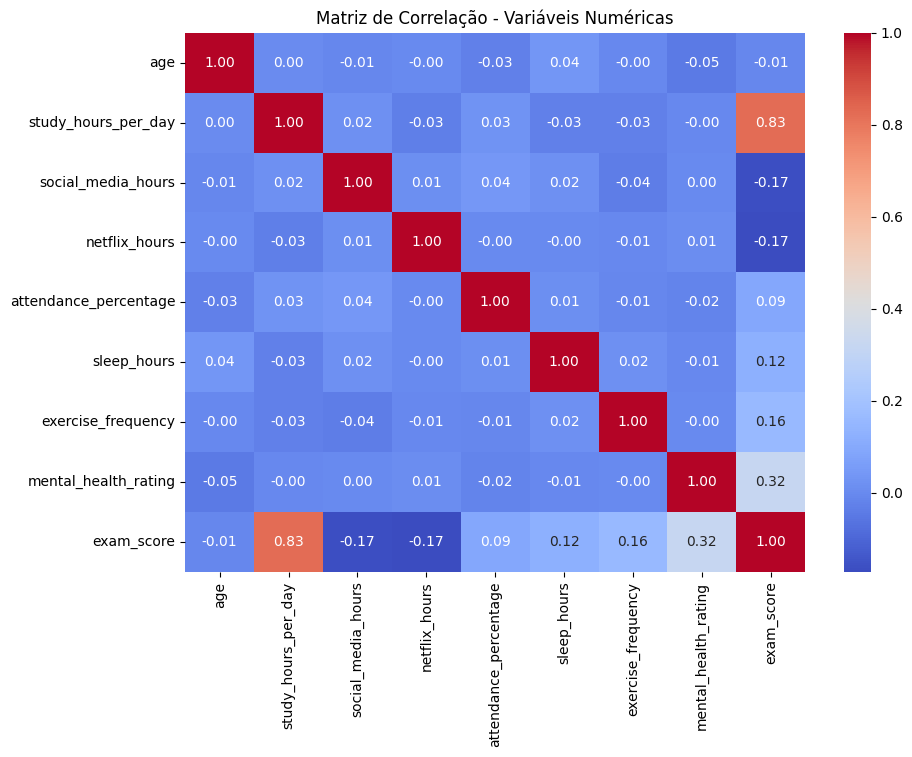

In [8]:
## Matriz de correlação
corr = df.select_dtypes(include='number').corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.show()

Aqui observamos que as horas estudadas por dia estão extremamente correlacionadas com o desempenho do exame, enquanto o tempo em redes sociais e horas na netflix, possuem um impacto negativo na nota dos exames

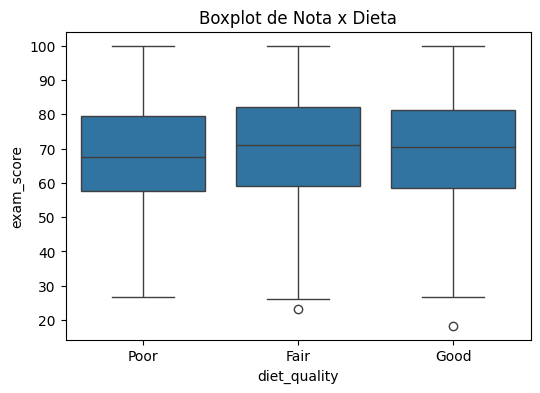

In [10]:
## Testando por grupos categóricos

## Dieta vs nota
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='diet_quality', y='exam_score', order=['Poor', 'Fair', 'Good'])
plt.title('Boxplot de Nota x Dieta')
plt.show()

Alunos com dieta Good tiram  notas melhores? Os valores indicam que os valores de Fair e Good são iguais, porém, uma boa dieta influencia minimamente na performace

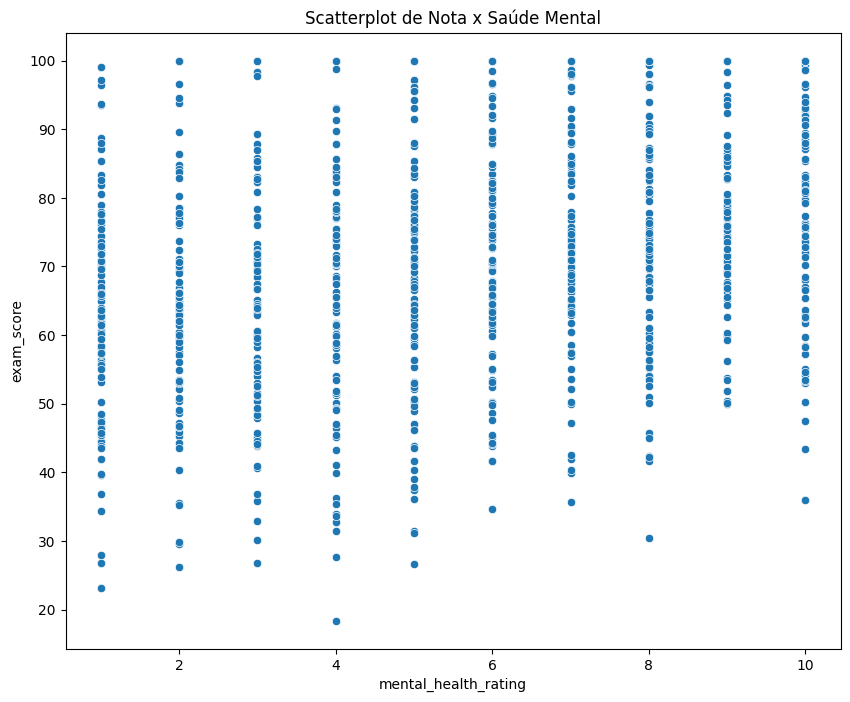

In [14]:
## Saúde mental x Nota
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='mental_health_rating', y='exam_score')
plt.title('Scatterplot de Nota x Saúde Mental')
plt.show()

Não parece ter tanta influência, assim como a dieta, porém, nessa amotrsta, vemos que alunos com uma saúde mental maior, possui uma média de notas maior, passando do >= 50  quando os valores ficam entre 8 e 10. E possuem uma média menor quando os valores são menores que 6

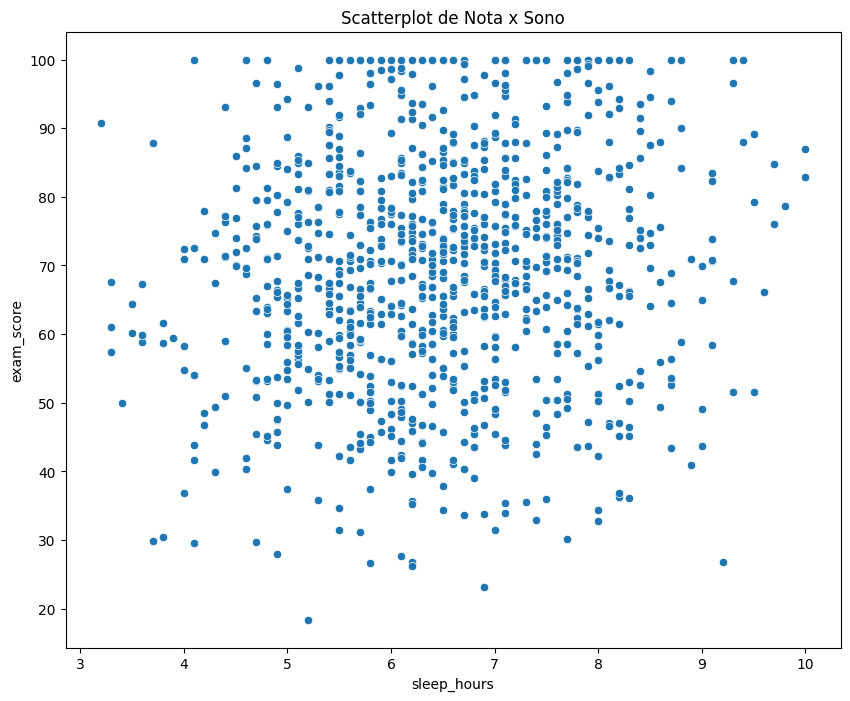

In [15]:
# Sono x Nota
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='sleep_hours', y='exam_score')
plt.title('Scatterplot de Nota x Sono')
plt.show()

Muito disperso e dificil de encontrar um ponto ideal de sono

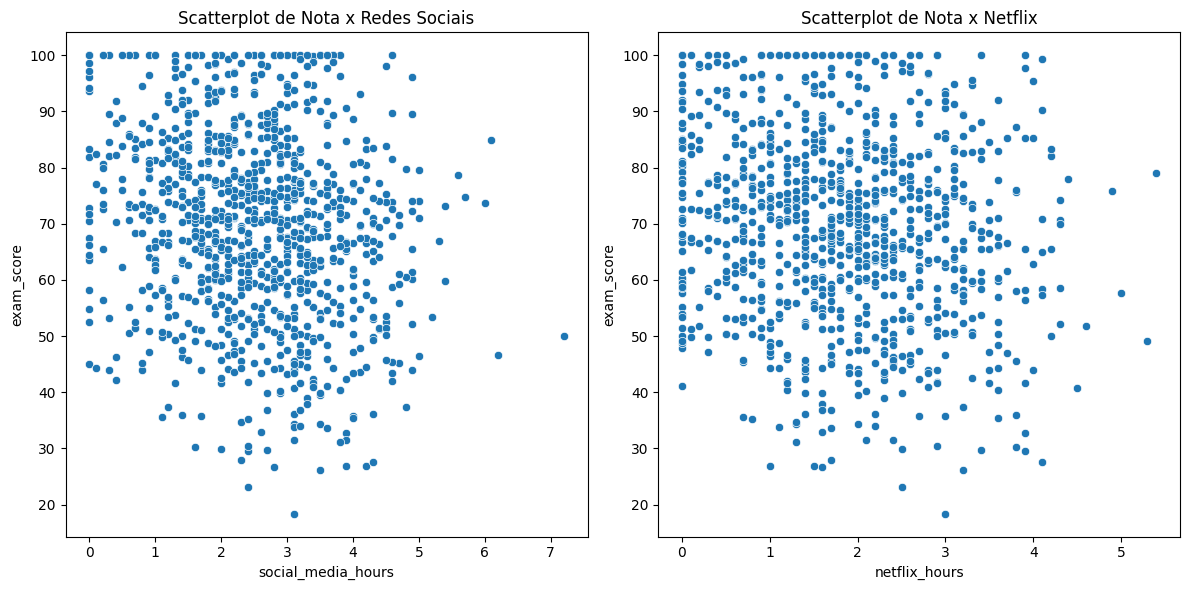

In [17]:
# Redes sociais / Netflix x Nota
fig, axes = plt.subplots(1,2, figsize=(12,6))

# Redes sociais
sns.scatterplot(ax=axes[0], data=df, x='social_media_hours', y='exam_score')
axes[0].set_title('Scatterplot de Nota x Redes Sociais')

# Netflix
sns.scatterplot(ax=axes[1], data=df, x='netflix_hours', y='exam_score')
axes[1].set_title('Scatterplot de Nota x Netflix')

plt.tight_layout()
plt.show()

Vemos que há uma forte correlação entre menores tempos de entretenimento quanto ao valor da nota

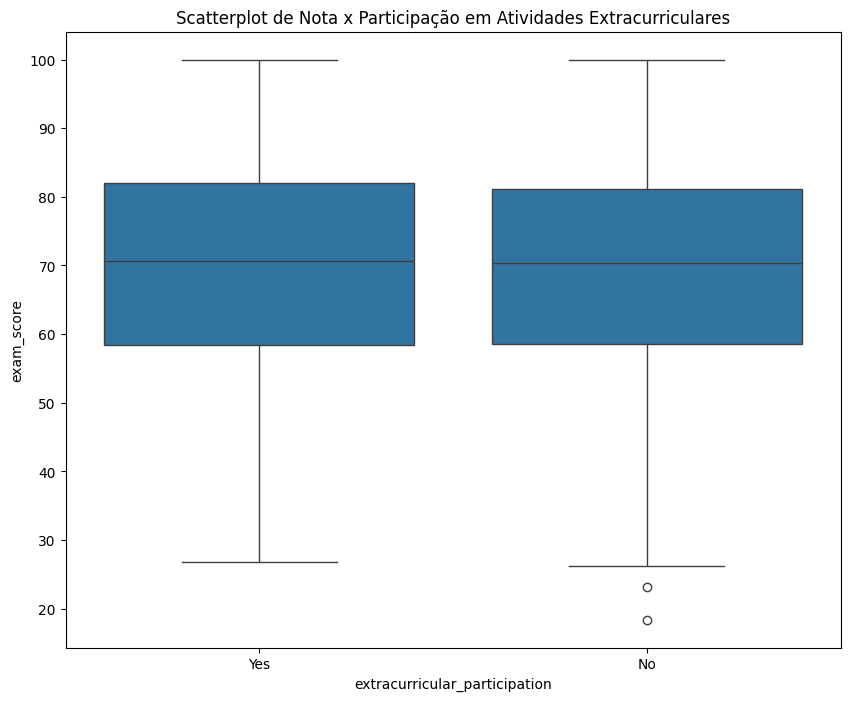

In [20]:
# Participação de atividades extracurriculares x Nota
plt.figure(figsize=(10,8))
sns.boxplot(data=df, x='extracurricular_participation', y='exam_score')
plt.title('Scatterplot de Nota x Participação em Atividades Extracurriculares')
plt.show()

Participar ou não de atividades extracurriculares não parece influenciar muito na nota, porém, os valores de outliers muito baixos estão entre aqueles que não participam

## Possíveis conclusões

- `study_hours_per_day` tem forte correlação positiva com exam_score (hipótese confirmada)
- `social_media_hours` e `netflix_hours` têm correlação levemente negativa com nota
- Dietas "Good" e "Fair" → notas mais altas do que "Poor"
- Participação em atividades extracurriculares não mostra diferença clara (ou pode depender de contexto)
- Sono parece ter um ponto ideal (~6 a 8h), com queda nas pontas

## Entendendo e implementando o K-means

Agora que foi feita uma análise de dados, vamos entender o que o algoritmo de K-means representa para essa clusterização

O K-Means é um algoritmo de clusterização não supervisionado que agrupa os dados em K grupos baseando-se em distância entre pontos e centróides.
Etapas do K-Means:

    1. Escolhe K centróides aleatórios

    2. Atribui cada ponto ao centróide mais próximo

    3. Atualiza os centróides com a média dos pontos atribuídos

    4. Repete os passos 2 e 3 até convergir

In [24]:
# Padronizando atributos numéricos
from sklearn.preprocessing import StandardScaler

features = ['study_hours_per_day', 'sleep_hours', 'social_media_hours',
            'netflix_hours', 'attendance_percentage', 'exercise_frequency',
            'mental_health_rating']

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(x_scaled, columns=features)
df_scaled.head()

# Implemetando K-means from Scratch
'''
A distancia euclideana calcula a distância entre dois pontos no espaço.
O K-means utiliza para realizar calcular a distância entre pontos e centróides
'''
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

'''
Criar uma função que inicialize 2 pontos aleatórios como o centroide, com o tempo
esses valores serão ajustados para a convergência
'''
def initialize_centroids(X, k):
  centroids = np.random.choice(X.shape[0], k, replace=False)
  return X[centroids]

'''
Criar uma função de atribuição de cluster, que atribui cada ponto ao centróide mais próximo
'''
def assign_clusters(X, centroids):
  clusters = []
  for x in X:
    distances = [euclidean_distance(x, centroid) for centroid in centroids]
    cluster = np.argmin(distances)
    clusters.append(cluster)
  return np.array(clusters)

'''
Criar uma função na qual realizará a atualização de cada cluster, ou seja.
para cada valor x no cluster, calcula a média dos pontos atribuidos a ele e definie isso como
o novo centroide
'''
def update_centroids(X, clusters, k):
  centroids = []
  for i in range(k):
    cluster_points = X[clusters == i]
    centroid = np.mean(cluster_points, axis=0)
    centroids.append(centroid)
  return np.array(centroids)


'''
Algoritmo de K-means:
Inicializa centróides
Atribui os pontos aos centróides mais próximos
Atualiza os centróides
Repete até os centróides não mudarem mais (convergência)
'''
def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    for i in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

## Método do cotovelo para escolher o melhor K
É uma técnica que te ajuda a definir o número ideal de clusters (K) analisando a inércia (soma das distâncias internas de cada cluster). Ele se baseia na ideia de que: Conforme aumentamos o número de clusters, a compactação (qualidade dos grupos) melhora, mas até certo ponto. Depois disso, o ganho é mínimo.

Para cada valor de K, calculamos a inércia, que é a soma das distâncias quadradas de cada ponto até seu centróide.
- Quanto menor a inércia, melhor os pontos estão agrupados em torno de seus centróides.
- A inércia sempre diminui com o aumento de K (mais clusters = mais próximos), mas em algum ponto, o ganho é irrelevante.


**Etapas do método do cotovelo:**
1. Rodar o K-Means para vários valores de K (ex: de 1 a 10)
2. Calcular a inércia para cada K
3. Plotar um gráfico K × Inércia
4. Identificar o ponto onde a curva faz uma "quebra" ou "cotovelo" — esse é o melhor K

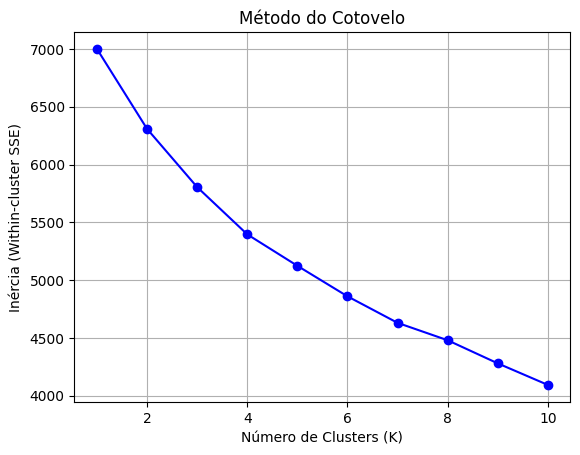

In [25]:
inertia_list = []
K_range = range(1, 11)

for k in K_range:
    clusters, centroids = kmeans(X_scaled, k)
    # Soma das menores distâncias quadradas para cada ponto
    inertia = sum(np.min([np.sum((X_scaled - c)**2, axis=1) for c in centroids], axis=0))
    inertia_list.append(inertia)

# Gráfico do cotovelo
plt.plot(K_range, inertia_list, 'bo-')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inércia (Within-cluster SSE)')
plt.title('Método do Cotovelo')
plt.grid(True)
plt.show()


Com base no gráfico, vemos que a partir do k=4, os valores começam a diminuir de forma mais lenta, ou seja, um bom valor para testar como "Cotovelo", segundo o método do cotovelo, o valor de k é o ponto onde o esforço para separar mais não compensa mais o ganho

## Clusterização

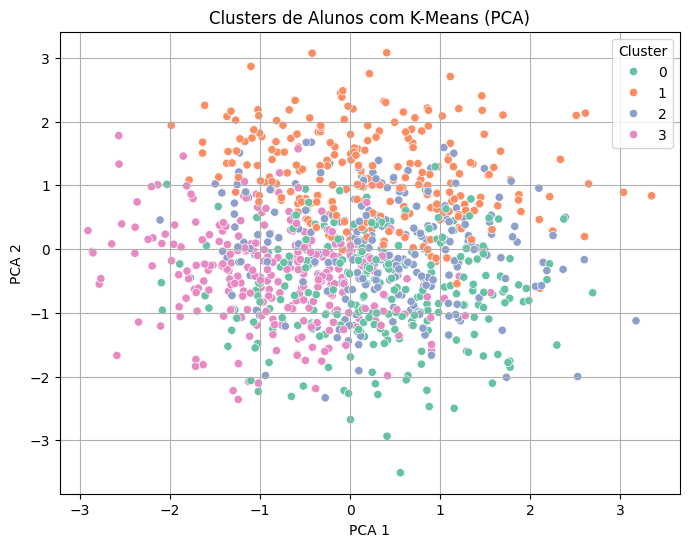

In [26]:
from sklearn.decomposition import PCA

final_k = 4
final_clusters, final_centroids = kmeans(X_scaled, final_k)

# Reduzir dimensionalidade para visualizar
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=final_clusters, palette='Set2')
plt.title('Clusters de Alunos com K-Means (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [27]:
df['cluster'] = final_clusters

# Ver médias por cluster
df.groupby('cluster')[features + ['exam_score']].mean().T

cluster,0,1,2,3
study_hours_per_day,3.684774,2.550833,4.615833,3.374368
sleep_hours,5.662963,7.108333,6.847083,6.298556
social_media_hours,2.972840,3.234167,2.139167,1.781588
netflix_hours,1.781893,2.150000,1.650000,1.713718
attendance_percentage,80.083539,88.629167,90.990000,77.844043
exercise_frequency,1.810700,2.854167,3.604167,3.797834
mental_health_rating,7.465021,3.933333,6.716667,3.855596
exam_score,70.202469,55.739167,86.007917,66.870036


| Cluster | Estudo (h/dia) | Sono (h/dia) | Redes Sociais | Nota Média | Saúde Mental | Exercício | Frequência |
| ------- | -------------- | ------------ | ------------- | ---------- | ------------ | --------- | ---------- |
| **0**   | 3.68           | 5.66         | 2.97          | 70.20      | 7.46         | 1.81      | 80.08%     |
| **1**   | 2.55           | 7.11         | 3.23          | 55.74      | 3.93         | 2.85      | 88.63%     |
| **2**   | 4.61           | 6.85         | 2.14          | 86.01      | 6.71         | 3.60      | 90.99%     |
| **3**   | 3.37           | 6.30         | 1.78          | 66.87      | 3.85         | 3.80      | 77.84%     |

**Cluster 0 — Estudante médio saudável, mas sedentário**

    Estuda regularmente (3.6h), sono mais baixo (5.6h)
    Usa bastante redes sociais (quase 3h)
    Boa saúde mental (7.46)
    Pouco exercício
    Nota mediana-alta (70)

Interpretação:

    Pode representar estudantes que mantêm um bom controle mental, mas que sacrificam sono e exercício, talvez por uso de redes ou estudo.

**Cluster 1 — Estudante que “se cuida”, mas tem nota baixa**

    Dorme bem (7.1h), mas estuda pouco (2.5h)
    Usa bastante redes sociais e Netflix
    Saúde mental baixa (3.93)
    Frequência boa (88%), mas nota baixa (55.7)

Interpretação:

    Apesar de dormir bem e se exercitar moderadamente, a baixa saúde mental e o pouco estudo afetam o desempenho. Pode estar desmotivado ou distraído.

**Cluster 2 — Estudante de alto desempenho**

    Estuda mais (4.6h), dorme bem (6.8h), usa pouco redes sociais
    Melhor nota (86)
    Boa saúde mental (6.71) e exercício bom
    Maior frequência (90%)

Interpretação:

    Representa um perfil de aluno engajado e disciplinado, com equilíbrio entre estudo, sono e hábitos saudáveis.

**Cluster 3 — Alto esforço físico e disciplina, mas saúde mental baixa**

    Boa quantidade de exercício (3.8), pouco tempo em redes
    Saúde mental baixa (3.85), sono médio (6.3h)
    Nota intermediária (66.8)
    Boa frequência (77%)

Interpretação:

    Alunos disciplinados externamente, mas com sinais de sofrimento psicológico (saúde mental baixa). Isso pode afetar seu rendimento.



## Comparação de Hipóteses

| Hipótese                                  | Confirmada? | Evidência                                   |
| ----------------------------------------- | ----------- | ------------------------------------------- |
| Mais estudo = nota maior                  | ✅           | Cluster 2 tem maior estudo e nota           |
| Mais redes sociais = nota menor           | ✅           | Cluster 1 usa mais redes, nota menor        |
| Sono equilibrado = nota melhor            | ✅           | Clusters 0 e 2 dormem 6–7h, notas boas      |
| Boa saúde mental = nota melhor            | ✅           | Cluster 0 e 2: saúde mental boa e nota alta |
| Exercício influencia positivamente a nota | ❌ Parcial   | Cluster 3 se exercita bem, mas nota média   |
| Frequência = bom desempenho               | ❌ Parcial   | Cluster 1 tem alta frequência e nota baixa  |
